In [1]:
from brian2 import *
prefs.codegen.target = "numpy"

name = 'Некоррелированный равномерный шум'

num_neurons = 1
duration = 0.5*second
seed(42)
semen = siemens
msemen = msiemens

# Параметры модели
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*semen*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msemen*cm**-2 * area
g_kd = 30*msemen*cm**-2 * area
VT = -63*mV

# Уравнения модели
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')

group = NeuronGroup(num_neurons, eqs,
            threshold='v > -40*mV',
            refractory='v > -40*mV',
            method='exponential_euler')
group.v = El

group.run_regularly('I = randn()*nA', dt=defaultclock.dt)

state = StateMonitor(group, variables = ['v','m','n','h','I'], record = [0])

monitor = SpikeMonitor(group)

run(duration)

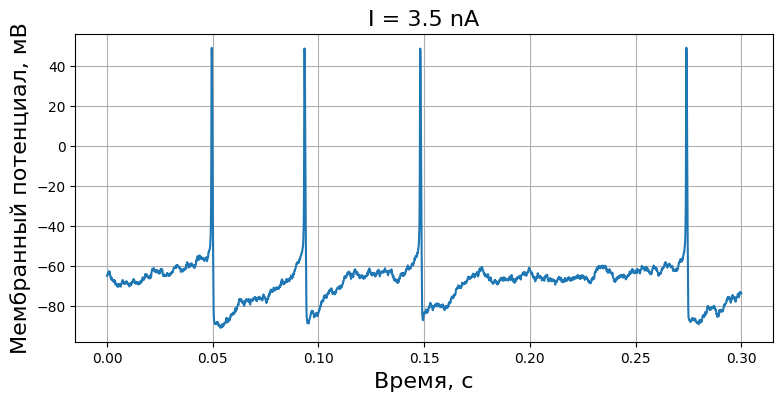

In [2]:
figure(figsize=(9, 4))
plot(state.t[0:3000]/second, state[0].v[0:3000]/mV)
xlabel('Время, с',fontsize=16)
ylabel('Мембранный потенциал, мВ',fontsize=16)
grid()
title('I = '+ str(0.7 * 5 / num_neurons)+' nA',fontsize=16)
savefig(name+'(GAUSS)I = '+ str(0.7 * 5 / num_neurons)+'nA'+ 'mp'+str(len(state.t[0:3000]/second)) +'.png')

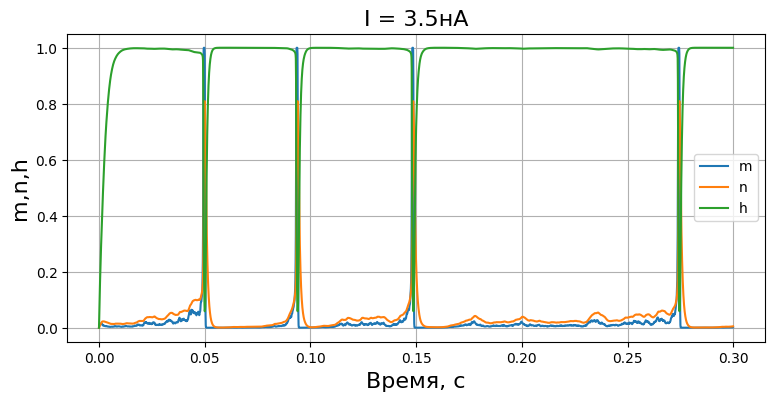

In [3]:
figure(figsize=(9, 4))
plot(state.t[0:3000]/second, state[0].m[0:3000], label = "m")
plot(state.t[0:3000]/second, state[0].n[0:3000], label = "n")
plot(state.t[0:3000]/second, state[0].h[0:3000], label = "h")
xlabel('Время, с',fontsize=16)
ylabel('m,n,h',fontsize=16)
legend()
grid()
title('I = '+ str(0.7 * 5 / num_neurons)+'нA',fontsize=16)
savefig(name+'I='+ str(0.7 * 5 / num_neurons)+'nA'+ 'mnh'+str(len(state.t[0:3000]/second)) +'.png')

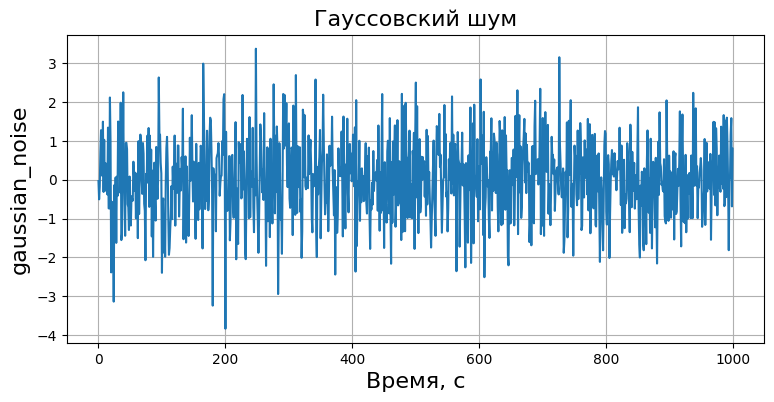

<Figure size 640x480 with 0 Axes>

In [12]:
mean = 0  # Среднее значение
std_dev = 1  # Ст.отклон.
num_samples = 1000  # Число точек 

# Сгенерируем переменную используя функцию из прошлых ячеек 
gaussian_noise = np.random.normal(mean, std_dev, num_samples)

# Создаём ось абсцисс
time = np.arange(0, num_samples)

figure(figsize=(9, 4))
plt.plot(time, gaussian_noise)
xlabel('Время, с',fontsize=16)
ylabel('gaussian_noise',fontsize=16)
title('Гауссовский шум',fontsize=16)
plt.grid(True)
plt.show()
savefig(name+'Гауссовский шум'+str(len(state.t[0:3000]/second)) +'.png')

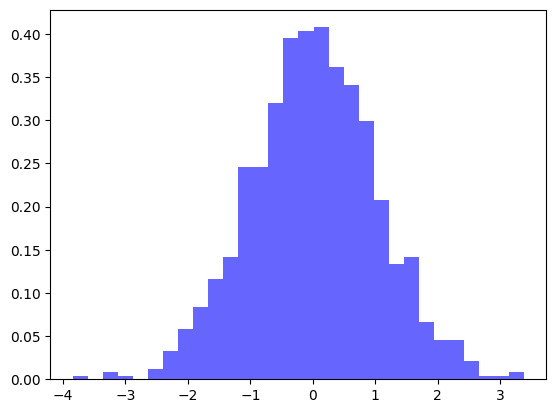

In [15]:
plt.hist(gaussian_noise, bins=30, density=True, alpha=0.6, color='b')
savefig(name+'Гистограмма распределения случайных значений'+'.png')